<font size=7>Create Raw dataset - Adult Dentate Gyrus

Here I create a raw dataset for the adult dentate gyrus between **210-220** seconds. I follow the tutorial `raw_data/1_processing_raw_data.ipynb` in order to create the raw dataset

# <font color="blue"> Get Dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import pickle

import braingeneers.data.datasets_electrophysiology as ephys

In [2]:
metadata = ephys.load_metadata("2022-11-02-e-Hc11.1-chip16753")

In [3]:
metadata["ephys_experiments"]["experiment2"]

{'blocks': [{'num_frames': 11353000,
   'path': 'original/data/hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5'}],
 'hardware': 'Maxwell',
 'name': 'experiment2',
 'notes': '',
 'num_channels': 1028,
 'sample_rate': 20000,
 'scaler': 1,
 'timestamp': '2022-11-02T3:39:44',
 'units': 'µv',
 'version': 20160704,
 'mapping': [[0, 10430, 1575.0, 822.5],
  [1, 15586, 3255.0, 1225.0],
  [2, 10872, 1610.0, 857.5],
  [3, 17355, 3412.5, 1365.0],
  [4, 10449, 1907.5, 822.5],
  [5, 15795, 3062.5, 1242.5],
  [6, 10878, 1715.0, 857.5],
  [7, 16233, 3027.5, 1277.5],
  [8, 10436, 1680.0, 822.5],
  [9, 12706, 2905.0, 997.5],
  [10, 6932, 1960.0, 542.5],
  [11, 17351, 3342.5, 1365.0],
  [12, 13086, 1855.0, 1032.5],
  [13, 15142, 3185.0, 1190.0],
  [14, 8867, 1172.5, 700.0],
  [15, 17793, 3377.5, 1400.0],
  [16, 13523, 1802.5, 1067.5],
  [17, 14014, 2695.0, 1102.5],
  [18, 11325, 1837.5, 892.5],
  [19, 16464, 3220.0, 1295.0],
  [20, 9142, 2135.0, 717.5],
  [21, 15353, 3027.5, 1207.5],
  [2

In [5]:
raw_data = ephys.load_data( metadata=metadata, experiment="experiment2", offset=210*20000, length=10*20000, channels=None )

/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:197: UserWarning: Dataset 2022-11-02-e-Hc11.1-chip16753 is not in row-major format, the parallel data reader can't be used, read speeds may be slow over a network.
  warnings.warn(f'Dataset {batch_uuid} is not in row-major format, the parallel data reader '
/srv/conda/envs/notebook/lib/python3.10/site-packages/braingeneers/data/datasets_electrophysiology.py:209: UserWarning: Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.
  warnings.warn('Metadata is missing the required voltage_scaling_factor attribute. Using default value of 1.0.')


In [6]:
raw_data.shape

(1028, 200000)

# <font color="blue"> Process and Save Data

get channel map

shape: (995, 4)
channel_id ,  x ,  y ,  ?
[[0.0000e+00 1.0430e+04 1.5750e+03 8.2250e+02]
 [1.0000e+00 1.5586e+04 3.2550e+03 1.2250e+03]
 [2.0000e+00 1.0872e+04 1.6100e+03 8.5750e+02]
 [3.0000e+00 1.7355e+04 3.4125e+03 1.3650e+03]]


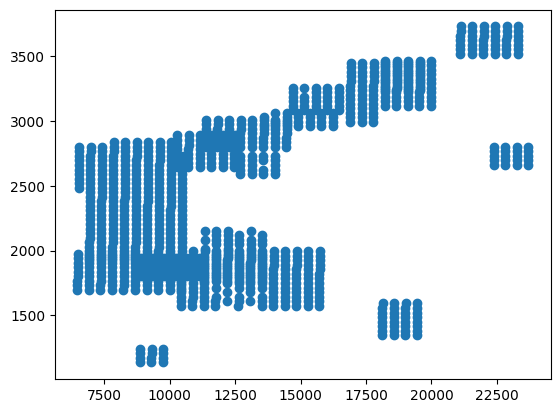

In [7]:
channel_map = np.array( metadata['ephys_experiments']['experiment2']["mapping"] )

print( "shape:", channel_map.shape )
print( "channel_id , ", "x , ", "y , ", "?")
print( channel_map[0:4,:] )
plt.scatter(channel_map[:,1], channel_map[:,2] ) # make a scatterplot of the first and seconds columns of channel_map

downsample data

In [8]:
data_down = []  # the variable that will hold the downsambled data
for i in channel_map[:,0].astype(int) : # we gather data for ever channel that was recorded from, (these channels are in the channel map of the metadata)
    data_down.append( signal.decimate( raw_data[i,:], 20 )  ) # we get everyt 20th data point, andthen append it to the data_down variable
data_down = np.array( data_down ) # we turn the data into an np.array for easier future analysis

print( "data has ", 20000/20, " frames per second")

data has  1000.0  frames per second


save data

In [9]:
to_pickle = {"data": data_down, "xy": channel_map[:,1:3], "frame_rate": 20000/20, "start_time": 210, "stop_time": 220, 
             "file":"hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5", "UUID":"2022-11-02-e-Hc11.1-chip16753"}

In [11]:
# with open( '/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start210s_stop220s_fs1ms.pkl' , 'wb') as file:
#     pickle.dump(to_pickle, file)

In [12]:
a_file = open('/workspaces/human_hippocampus/data/ephys_raw/2022-11-02-e-Hc11.1-chip16753/D_start210s_stop220s_fs1ms.pkl', 'rb')
checkit = pickle.load(a_file)
a_file.close()
checkit

{'data': array([[544.86646, 543.1902 , 543.0875 , ..., 537.2133 , 537.8987 ,
         538.4303 ],
        [538.71735, 538.08673, 537.7871 , ..., 544.502  , 544.34216,
         543.8093 ],
        [510.0763 , 510.83844, 510.64697, ..., 513.9962 , 513.60925,
         513.7171 ],
        ...,
        [508.031  , 506.254  , 506.3627 , ..., 508.75064, 508.87717,
         509.2172 ],
        [533.8517 , 529.6479 , 533.47656, ..., 534.275  , 533.16077,
         532.8672 ],
        [549.7113 , 547.501  , 546.4082 , ..., 545.7874 , 545.1851 ,
         544.5516 ]], dtype=float32),
 'xy': array([[10430. ,  1575. ],
        [15586. ,  3255. ],
        [10872. ,  1610. ],
        ...,
        [ 9351. ,  1942.5],
        [16016. ,  3080. ],
        [ 9166. ,  2555. ]]),
 'frame_rate': 1000.0,
 'start_time': 210,
 'stop_time': 220,
 'file': 'hc11.1_plated-11.1_chip-16753_rec_11.2.22AM-immediate_D.raw.h5',
 'UUID': '2022-11-02-e-Hc11.1-chip16753'}